**Import Necessary Dataset**


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle
import plotly.express as px
import streamlit as st

**Loading the dataset**

In [3]:

car_data = pd.read_csv("car_data.csv")
car_data.head()

,index,Make,Model,Year,Trim,MSRP,Invoice Price,Used/New Price,Body Size,Body Style,Cylinders,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Highway Fuel Economy
0,0,Aston Martin,DBX707,2024,Base,"$242,000",NaN,"$242,000",Large,SUV,V8,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,20 mpg
1,1,Audi,A3,2024,Premium w/40 TFSI,"$35,800","$33,653","$35,800",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg
2,2,Audi,A3,2024,Premium w/40 TFSI,"$37,800","$35,533","$37,800",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,"$41,400","$38,917","$41,400",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,"$39,400","$37,037","$39,400",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg


In [4]:
# checking the number of rows and columns
car_data.shape

(1610, 17)

In [5]:
# getting some information about the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 1610 non-null   int64 
 1   Make                  1610 non-null   object
 2   Model                 1610 non-null   object
 3   Year                  1610 non-null   int64 
 4   Trim                  1610 non-null   object
 5   MSRP                  1610 non-null   object
 6   Invoice Price         1058 non-null   object
 7   Used/New Price        1610 non-null   object
 8   Body Size             1610 non-null   object
 9   Body Style            1610 non-null   object
 10  Cylinders             1445 non-null   object
 11  Engine Aspiration     1610 non-null   object
 12  Drivetrain            1610 non-null   object
 13  Transmission          1610 non-null   object
 14  Horsepower            1605 non-null   object
 15  Torque                1583 non-null   

**Data Pre-processing**

In [6]:
# Investigate all the elements whithin each Feature 

for column in car_data:
    unique_vals = np.unique(car_data[column].fillna('0'))
    nr_values = len(unique_vals)
    if nr_values <= 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature index :1610
The number of values for feature Make :7 -- ['Aston Martin' 'Audi' 'BMW' 'Bentley' 'Ford' 'Mercedes-Benz' 'Nissan']
The number of values for feature Model :150
The number of values for feature Year :2 -- [2023 2024]
The number of values for feature Trim :373
The number of values for feature MSRP :1317
The number of values for feature Invoice Price :944
The number of values for feature Used/New Price :1317
The number of values for feature Body Size :3 -- ['Compact' 'Large' 'Midsize']
The number of values for feature Body Style :12 -- ['Cargo Minivan' 'Cargo Van' 'Convertible' 'Convertible SUV' 'Coupe'
 'Hatchback' 'Passenger Minivan' 'Passenger Van' 'Pickup Truck' 'SUV'
 'Sedan' 'Wagon']
The number of values for feature Cylinders :10 -- ['0' 'I3' 'I4' 'I5' 'I6' 'V10' 'V12' 'V6' 'V8' 'W12']
The number of values for feature Engine Aspiration :6 -- ['Electric Motor' 'Naturally Aspirated' 'Supercharged' 'Turbocharged'
 'Twin-Turbo' 'Twincharged']

In [7]:
# Checking for null values
car_data.isnull().sum()

index                     0
Make                      0
Model                     0
Year                      0
Trim                      0
MSRP                      0
Invoice Price           552
Used/New Price            0
Body Size                 0
Body Style                0
Cylinders               165
Engine Aspiration         0
Drivetrain                0
Transmission              0
Horsepower                5
Torque                   27
Highway Fuel Economy    424
dtype: int64

### 4.2. Dealing with missing values

In [8]:
# droping the columns that have lot's of nulls
car_data = car_data.drop(['Invoice Price', 'Cylinders','Highway Fuel Economy'], axis=1)

In [9]:
# dealing with the columns that have missing values
car_data.head()

# creating a new column just for the number
car_data['Horsepower_No'] = car_data['Horsepower'].str[0:3].astype(float)

# viewing the null values
car_data[car_data['Horsepower_No'].isna()]

# calculating the mean for ford cars
mean_horsepower = car_data['Horsepower_No'][car_data['Make'] == 'Ford'].mean()

# filling in the null values with the mean
car_data['Horsepower_No'] = car_data['Horsepower_No'].fillna(mean_horsepower)
car_data['Horsepower'] = car_data['Horsepower'].fillna(mean_horsepower)


car_data.isnull().sum()

index                 0
Make                  0
Model                 0
Year                  0
Trim                  0
MSRP                  0
Used/New Price        0
Body Size             0
Body Style            0
Engine Aspiration     0
Drivetrain            0
Transmission          0
Horsepower            0
Torque               27
Horsepower_No         0
dtype: int64

In [10]:
# creating a new column just for the number
car_data['Torque_No'] = car_data['Torque'].str[0:3].astype(float)

# viewing the null values
car_data[car_data['Torque_No'].isna()]

# caclulating the mean for all cars
mean_torque = car_data['Torque_No'].mean()

# filling in the null values with the mean
car_data['Torque_No'] = car_data['Torque_No'].fillna(mean_torque)
car_data['Torque'] = car_data['Torque'].fillna(mean_torque)

car_data.isnull().sum()

index                0
Make                 0
Model                0
Year                 0
Trim                 0
MSRP                 0
Used/New Price       0
Body Size            0
Body Style           0
Engine Aspiration    0
Drivetrain           0
Transmission         0
Horsepower           0
Torque               0
Horsepower_No        0
Torque_No            0
dtype: int64

**Cleaning the data types**

In [11]:
car_data.dtypes

index                  int64
Make                  object
Model                 object
Year                   int64
Trim                  object
MSRP                  object
Used/New Price        object
Body Size             object
Body Style            object
Engine Aspiration     object
Drivetrain            object
Transmission          object
Horsepower            object
Torque                object
Horsepower_No        float64
Torque_No            float64
dtype: object

In [12]:
# cleaning MSRP
car_data['MSRP'] = car_data['MSRP'].str.replace('$','')
car_data['MSRP'] = car_data['MSRP'].str.replace(',','').astype(float)

car_data['Used/New Price'] = car_data['Used/New Price'].str.replace('$','')
car_data['Used/New Price'] = car_data['Used/New Price'].str.replace(',','').astype(float)

**Visualizing the data**

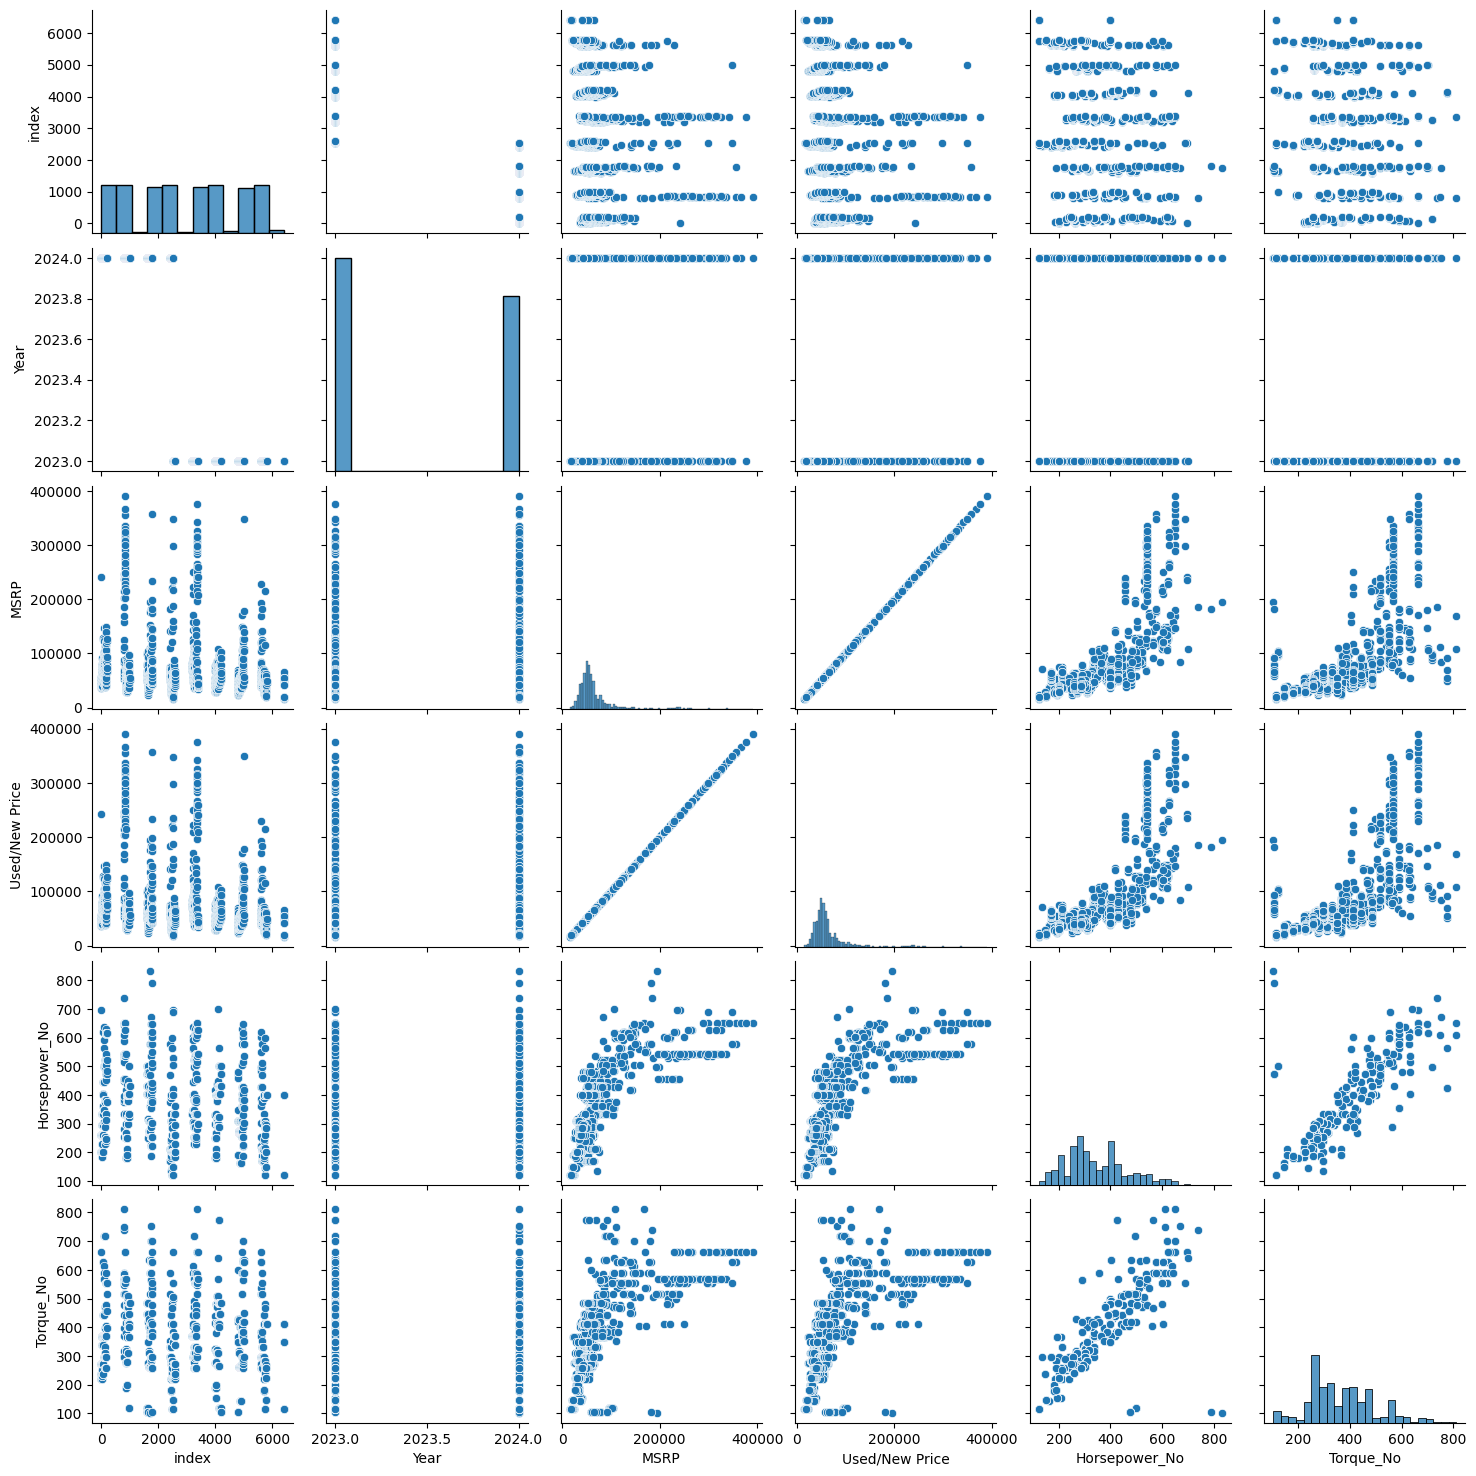

In [13]:
g = sns.pairplot(car_data)

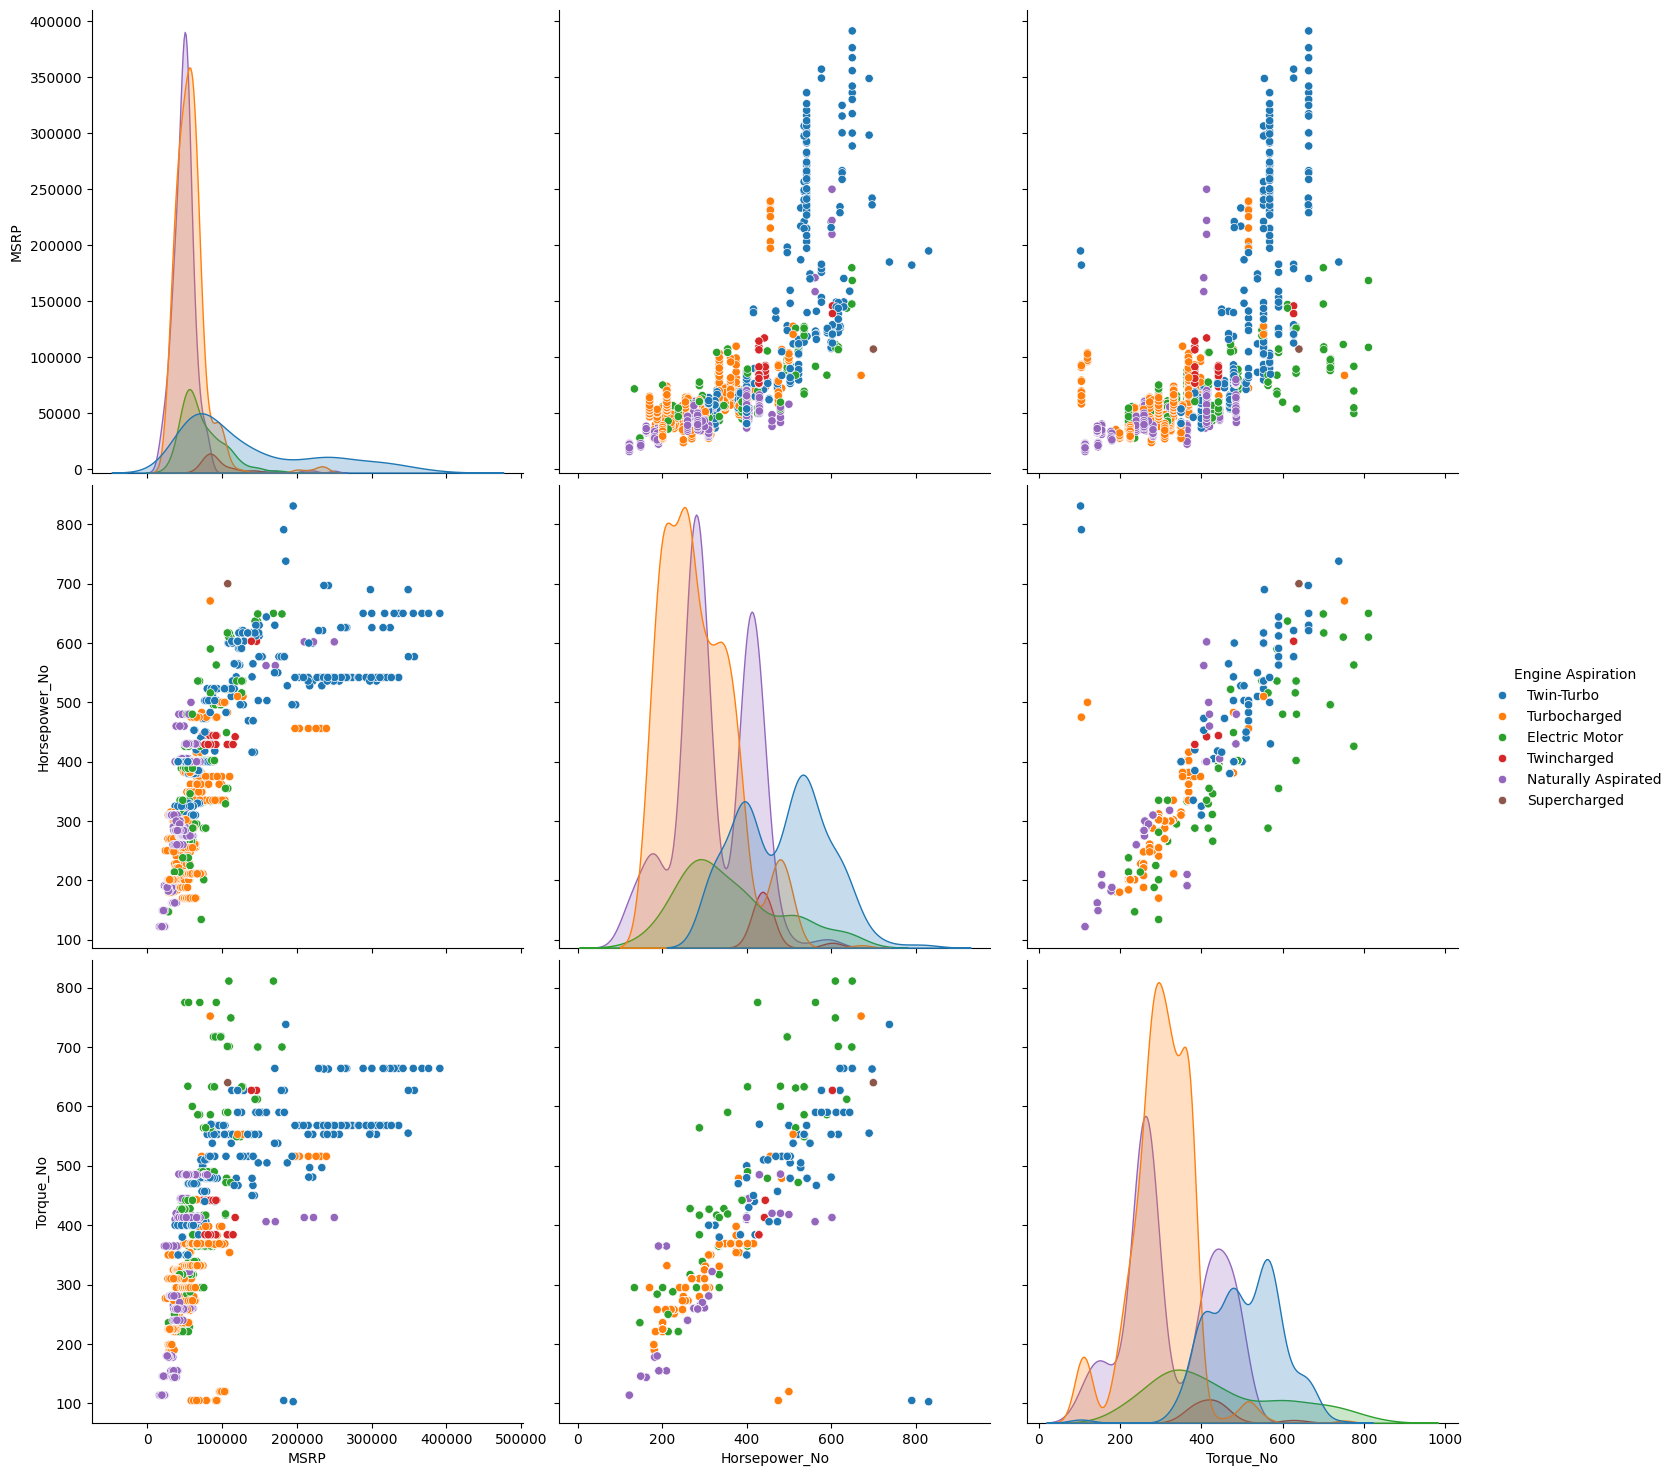

In [14]:
#Visualising a Subset of our data - important features
g = sns.pairplot(car_data[['MSRP', 'Horsepower_No', 'Torque_No', 'Engine Aspiration']], hue = 'Engine Aspiration', height = 5)

**Preparing the final DF**

In [15]:
# dropping the columns we do not need
new_car_data = car_data.drop(['index', 'Model','Year', 'Trim', 'Used/New Price', 'Horsepower', 'Torque'], axis=1)

# Making categorical variables into numeric representation
new_car_data = pd.get_dummies(new_car_data, columns = ['Make','Body Size','Body Style', 'Engine Aspiration', 'Drivetrain','Transmission'])

new_car_data.head()

,MSRP,Horsepower_No,Torque_No,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Ford,Make_Mercedes-Benz,Make_Nissan,...,Engine Aspiration_Supercharged,Engine Aspiration_Turbocharged,Engine Aspiration_Twin-Turbo,Engine Aspiration_Twincharged,Drivetrain_4WD,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD,Transmission_automatic,Transmission_manual
0,242000.0,697.0,663.0,True,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
1,35800.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
2,37800.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
3,41400.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
4,39400.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False


**Correlations with Heatmap**

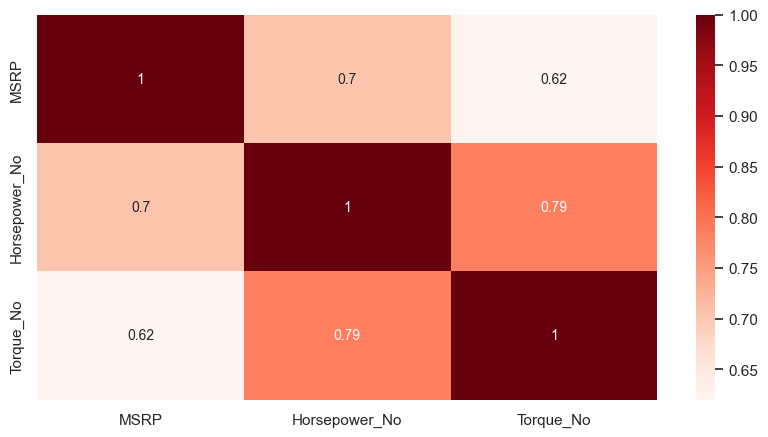

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
n_variables = ['MSRP','Horsepower_No','Torque_No']
pc = new_car_data[n_variables].corr(method ='pearson')
cols = n_variables
ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Reds")

**Feature Importance**

In [17]:
# Split the data into X & y

X = new_car_data.drop(['MSRP'], axis = 1)
y = new_car_data['MSRP'].astype(int)
print(X.shape)
print(y.shape)
dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

(1610, 36)
(1610,)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [18]:
# Calculating FI
for i, column in enumerate(new_car_data.drop('MSRP', axis=1)):
    print('Importance of feature {}: {:.3f}'.format(column, dt.feature_importances_[i]))
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature Horsepower_No: 0.247
Importance of feature Torque_No: 0.123
Importance of feature Make_Aston Martin: 0.000
Importance of feature Make_Audi: 0.023
Importance of feature Make_BMW: 0.014
Importance of feature Make_Bentley: 0.013
Importance of feature Make_Ford: 0.124
Importance of feature Make_Mercedes-Benz: 0.021
Importance of feature Make_Nissan: 0.006
Importance of feature Body Size_Compact: 0.021
Importance of feature Body Size_Large: 0.043
Importance of feature Body Size_Midsize: 0.032
Importance of feature Body Style_Cargo Minivan: 0.001
Importance of feature Body Style_Cargo Van: 0.025
Importance of feature Body Style_Convertible: 0.007
Importance of feature Body Style_Convertible SUV: 0.001
Importance of feature Body Style_Coupe: 0.008
Importance of feature Body Style_Hatchback: 0.000
Importance of feature Body Style_Passenger Minivan: 0.001
Importance of feature Body Style_Passenger Van: 0.001
Importance of feature Body Style_Pickup Truck: 0.021
Importance o

,index,Variable,Feature Importance Score
0,0,Horsepower_No,0.246967
1,6,Make_Ford,0.123919
2,1,Torque_No,0.122594
3,27,Engine Aspiration_Turbocharged,0.087128
4,10,Body Size_Large,0.042774
5,21,Body Style_SUV,0.032605
6,11,Body Size_Midsize,0.031677
7,33,Drivetrain_RWD,0.031109
8,25,Engine Aspiration_Naturally Aspirated,0.028327
9,30,Drivetrain_4WD,0.028094


**Hold-out validation**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1288, 36)
(322, 36)
(1288,)
(322,)


**Linear Regression**

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

# Model Training
lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

# Model prediction on Training Data
y_pred = lm.predict(X_train)
all_df_predict = lm.predict(X)

In [21]:
# Model Accuracy on training dataset
print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train))
print('The Accuracy r2  on the training dataset prediction is: ',r2_score(y_train,y_pred))
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))
print("")

# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))
print("")

# Coefficients
print('Coefficients: ', lm.coef_ )
print("")

# The Intercept
print('Intercept: ', lm.intercept_)

The Accuracy  on the training dataset is:  0.895779183244086
The Accuracy r2  on the training dataset prediction is:  0.895779183244086
The Accuracy  on the testing dataset is:  0.9198625302493006

The RMSE  on the training dataset is:  17421.7784480966
The RMSE  on the testing dataset is:  16534.594571973666

The MAE  on the training dataset is:  10599.011937878486
The MAE  on the testing dataset is:  11090.088349592686

Coefficients:  [ 2.22742940e+02 -1.89829669e+01  5.56034182e+04 -2.91161207e+04
 -3.66042366e+04  1.16226113e+05 -4.43839570e+04 -1.62628570e+04
 -4.54623600e+04  9.29404094e+01 -1.88423591e+02  9.54831816e+01
  6.09802309e+02  8.15969817e+03  1.42360673e+04  1.18332658e+02
  6.41353581e+02 -4.42967483e+03  6.15846845e+03  8.27078966e+03
 -1.77754623e+04 -5.15286113e+03 -3.70758421e+03 -7.12892964e+03
  6.29975752e+03  1.80270043e+03 -1.34977391e+04 -2.53004586e+02
  1.07576585e+04 -5.10937274e+03  4.83989383e+03 -3.37471593e+03
  4.33305973e+03 -5.79823762e+03  1.039

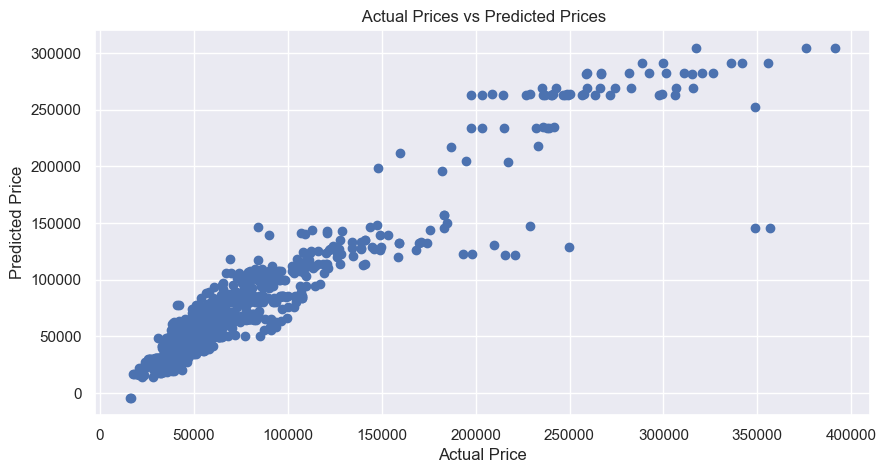

In [22]:
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

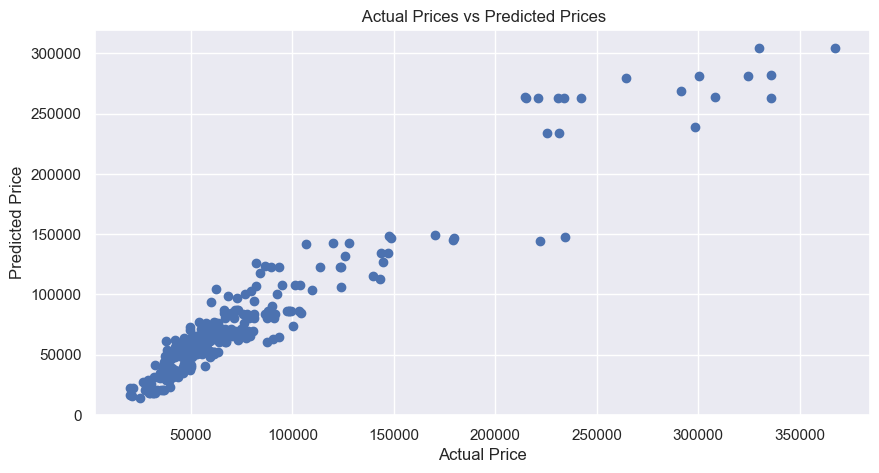

In [23]:
plt.scatter(y_test, lm.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

**Storing the Model & Results**

In [28]:
# Storing the ML Model
with open('Regression_model.pkl', 'wb') as f:
    pickle.dump(lm, f)

In [25]:
# Storing the Feature Importance
final_fi['Feature Importance Score'] = final_fi['Feature Importance Score'].round(4)
final_fi = final_fi.head(27)
final_fi.to_excel("Importance_Feature.xlsx")

In [27]:
# Adding the predicted values
car_data['MSRP Predictions'] = all_df_predict

# Exporting all the data with predictions
car_data.to_excel("Final_Dataset_with_Pred.xlsx")